In [4]:
import pandas as pd
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv', sep=',')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv', sep=',')

In [7]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [8]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [13]:
user_data.describe

<bound method NDFrame.describe of       client  premium  age
0      46346    False   58
1       4391    False   55
2      27372    False   64
3      11989    False   44
4      60664    False   49
...      ...      ...  ...
2949   19411    False   29
2950   61579    False   50
2951   61221     True   64
2952   29863    False   46
2953   78499    False   36

[2954 rows x 3 columns]>

In [15]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [28]:
#какой клиент совершил наибольшее число успешных операций
best_clients = logs.query('success == True') \
    .groupby(['client'], as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values(['success'], ascending=[False]) \
    .rename(columns={'success': 'successfull_operations'})

In [29]:
best_clients

,client,successfull_operations
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [30]:
best_clients['successfull_operations'].max()

41

In [36]:
#отбираем всех лучших клиентов в отдельную переменную
max_score = best_clients.query('successfull_operations == 41').sort_values(['client'], ascending=[True])

In [38]:
max_score = max_score.client.tolist()

In [39]:
max_score

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [40]:
#С какой платформы осуществляется наибольшее количество успешных операций
top_platforms = logs.query('success == True') \
    .groupby(['platform'], as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values(['success'], ascending=[False]) \
    .rename(columns={'success': 'successfull_operations'})

In [41]:
top_platforms

,platform,successfull_operations
1,phone,2019
0,computer,1090
2,tablet,180


In [42]:
full_data = user_data.merge(logs, how = 'inner', on = 'client')

In [43]:
full_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [45]:
#наиболее популярна среди премиумных клиентов
top_platforms_prem = full_data.query('success == True & premium == True') \
    .groupby(['platform'], as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values(['success'], ascending=[False]) \
    .rename(columns={'success': 'platform_rating'})

In [46]:
top_platforms_prem

,platform,platform_rating
1,phone,177
0,computer,108
2,tablet,18


In [47]:
#а теперь немного визуализации
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='age'>

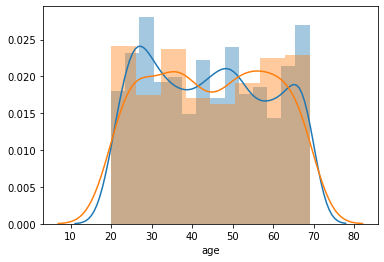

In [52]:
#распределение возраста премиальных и не премиальных клиентов
sns.distplot(full_data.query('premium ==False').age)
sns.distplot(full_data.query('premium ==True').age)


<AxesSubplot:xlabel='age'>

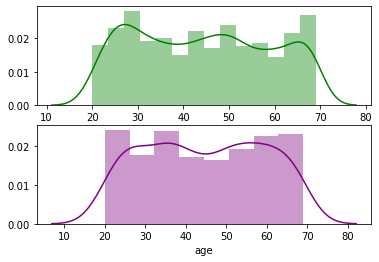

In [54]:
#то же самое, но красивее
fig, ax = plt.subplots(nrows = 2, ncols = 1)
sns.distplot(full_data.query('premium ==False').age, ax = ax[0], color = 'green')
sns.distplot(full_data.query('premium ==True').age, ax = ax[1],color = 'purple')


In [55]:
#нужно для графика распределения числа успешных операций
success_op = full_data.query('success == True') \
    .groupby(['client'], as_index=False) \
    .agg({'success': 'count'}) 

In [58]:
success_op

,client,success
0,40,1
1,75,1
2,81,1
3,132,1
4,164,1
...,...,...
2099,99908,1
2100,99926,1
2101,99927,1
2102,99931,1


<AxesSubplot:xlabel='success'>

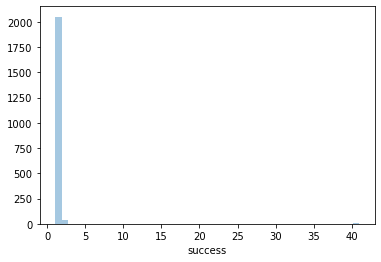

In [61]:
#рисуем
sns.distplot(success_op.success, kde = False)

In [62]:
#числа без графика
success_op.success.value_counts()

1     2051
2       42
41       9
40       1
3        1
Name: success, dtype: int64

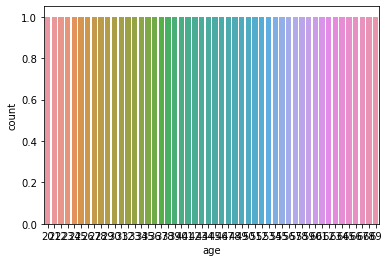

In [68]:
ax = sns.countplot(x="age", data=computer_top)

In [69]:
#xисло успешных операций, сделанных на платформе computer, в зависимости от возраста, используя
computer_top1 = full_data.query('success == True & platform == "computer"') 

In [70]:
computer_top1

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


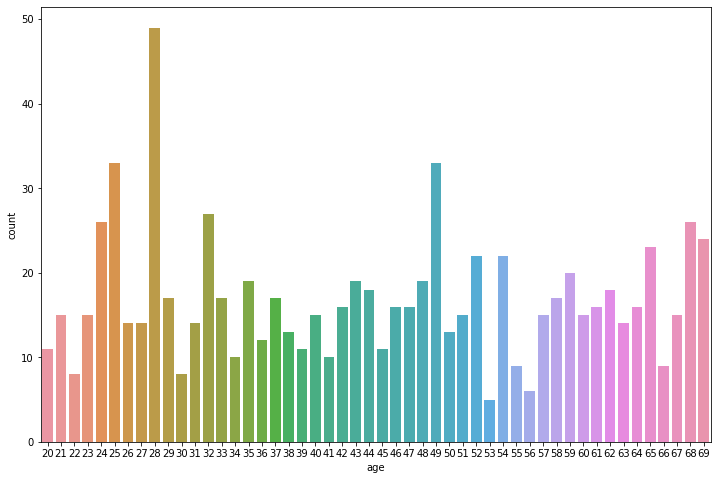

In [75]:
#рисуем красиво
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="age", data=computer_top1)
